# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 4 - Advanced Section - Reservoir Computing



**Harvard University**<br/>
**Spring 2019**<br/>
**Instructors**: Mark Glickman and Pavlos Protopapas 


<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- Please restart the kernel and run the entire notebook again before you submit.

### Overview
We discussed in class the formulation of the Reservoir Computing (RC) RNN. As an example, we saw the RC implementation in time series for the Mackey-Glass chaotic system. This example can be found in the seminal paper: http://www.rctn.org/vs265/jaeger04-ESN.pdf; we encourage you to read this publication.


In this HW, for the implementation of the RC you have to use the library "pyESN" which is available in https://github.com/cknd/pyESN. In the same directory, you can find the Mackey-Glass example that was discussed in the class. We encourage you to explore this library.

You have to employ the RC network to predict stock market prices. We provide you a time series for the daily Amazon stock price (file: "amazon.txt"). 
You need to study the Mackey-Glass example (mackey.ipynb) and then apply the RC for predicting the Amazon price.

You can observe that the input is a vetor of ones, so there is not input function. In this case the prediction is not a response to the previous signal. Essentially, the network is learning the pattern of the history (training set) and trying to make predictions based on that. That approach works pretty well because RC prerforms well in pattern recognition and analysis tasks.


You have to predict 100 future time points by using the previous 1500 prices. As we discussed in the class RC is very sensitive to the hyper-parameter. So, you have to find the optimal set of hyper-parameter that gives the best predictions. For convenience, we are asking you to optimize just two of the hyper-parameter, the spectrum radius  and a regularization term (noise); this regularization is different that the one that was discussed in the class. In particular, it adds noise in the hidden units to avoid the overfitting during the learning. The rest hyper-parameters are given.

The goals of this homework are for you to:
1. learn the mechanics of RC
2. confirm that RC training is fast
3. learn how to use RC for forecasting
4. acknowledge that RC is sensitive to hyper-parameters (no free lunch)
5. learn how to optimize hyper-parameters of RC
6. evaluate RC forecasting

### Overview for the pyESN library for the RC implementation


#### You call the RC as:
esn = ESN(n_inputs = 1, <br>
 $\quad$ $\quad$     n_outputs = #, <br>
 $\quad$ $\quad$     n_reservoir = #,<br>
 $\quad$ $\quad$     sparsity= #,<br>
 $\quad$ $\quad$     random_state= #, <br>
 $\quad$ $\quad$     spectral_radius = #,<br>
 $\quad$ $\quad$     noise= #)
<br> where # denotes the value that you choose.

##### Brief explanation of the parameters:
n_inputs: number of input dimensions <br>
n_outputs: numberr of output dimensions <br>
n_reservoir: number of reservoir neurons <br> 
random_state: seed for the random generator<br>
sparsity: proportion of recurrent weights set to zero <br>
spectral_radius: spectral radius of the recurrent weight matrix <br>
noise: noise added to each neuron (regularization) <br>


In [2]:
import numpy as np
from matplotlib import pyplot as plt

# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN 
%matplotlib inline


### Read the data

Read your dataset from the file amazon.txt

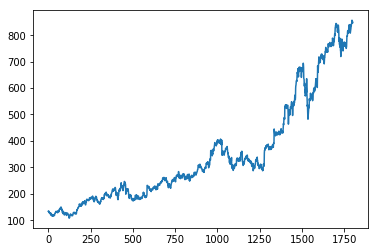

In [4]:
### your code here
data = np.loadtxt('amazon.txt')
plt.plot(data)

<div class='exercise'><b> Question 1: Predictions with the RC [3pts]  </b></div>
Use the ESN from the pyESN library to employ an RC network. The task here is to predict two time points ahead by using the previous 1500 points and do that for 100 future points (check the figure below). So, in the end you will have a 100 time step prediction with prediction-window = 2. This will be your validation set.

In this question you should use the following hyper-parameters:  
- n_reservoir = 500
- sparsity=0.2
- random_state=23
- spectral_radius=1.2
- noise = 0.005

<br> *Hint: Follow the mackey.ipynb example in pyESN*
<img src="seq_prediction2.gif">




In [5]:
### your code here
### your code here
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.2
noise = .0005


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

trainlen = 1500
future = 2
futureTotal=100
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]
 
 

Plot your prediction along with the ground truth (data) for the training and for the validation dataset

Text(0,0.5,'price')

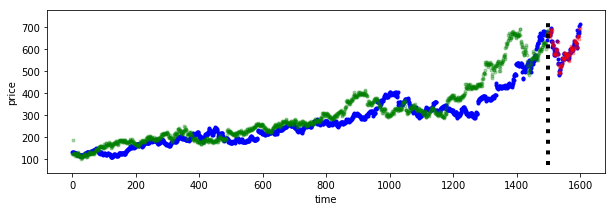

In [6]:
### your code here
### your code here
plt.figure(figsize=(10,3.))
plt.plot(range(0,trainlen+futureTotal),data[0:trainlen+futureTotal],'.b',label="data")
plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'.r',  alpha=0.3)

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)
plt.xlabel('time')
plt.ylabel('price')

Comment on the computational complexity of the training and evaluation of the RC. 

### your answer here

The computational complexity for an RC is quite small comparing standard RNNs. The reason is that we essentially train only the the weights of the output layer, which is a linear layer, so the computational complexity is the same with a linear regression task. In particular, the training complexity is of the order O(N) where N is the number of hidden units located in the reservoir. This makes the training and the evaluation very fast.

<div class='exercise'><b> Question 2: Hyper-parameters optimization [4 pts] </b></div>
We are asking you to find the optimal values for spectral_radius, noise  that gives the best prediction of this time series. In other words, we are looking for the hyper-parameters set that returns the minimum mean-square-error MSE. As previously, for each set of (spectral_radius, noise) you have to predict two time points ahead by using the previous 1500 points and do that for 100 steps as you did in Question 1. These are essentially your validation set. Then calculate the MSE loss for the validation set and show through visualization which set gives the lowest MSE.
<br>
Hints:
- Build a function for the MSE
- Perform a grid search for the hyper parameters spectral_radius and noise
- Use the ranges: spectrum_radius = [0.5, 1.5] and noise=[0.0001, 0.01]
- For each set of (spectral_radius, noise) train the RC and make predictions as in Q1; these predictions are the validation sets
- For each validation set calculate the MSE and store it
- Make a 2D color plot to show the MSE for the different values of spectral_radius and noise

Build a function for the MSE

In [7]:
### your code here
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))


Perform a grid search

In [36]:
### your code here


n_reservoir= 500
sparsity   = 0.2
rand_seed  = 23
radius_set = [0.9,  1,  1.1]
noise_set = [ 0.001, 0.004, 0.006]

radius_set = [0.5, 0.7, 0.9,  1,  1.1,1.3,1.5]
noise_set = [ 0.0001, 0.0003,0.0007, 0.001, 0.003, 0.005, 0.007,0.01]



radius_set_size  = len(radius_set)
noise_set_size = len(noise_set)

trainlen = 1500
future = 2
futureTotal= 100

loss = np.zeros([radius_set_size, noise_set_size])

for l in range(radius_set_size):
    rho = radius_set[l]
    for j in range(noise_set_size):
        noise = noise_set[j]

        pred_tot=np.zeros(futureTotal)

        esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = rho,
          noise=noise)

        for i in range(0,futureTotal,future):
            pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
            prediction = esn.predict(np.ones(future))
            pred_tot[i:i+future] = prediction[:,0]
        
        loss[l, j] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])        
        print('rho = ', radius_set[l], ', noise = ', noise_set[j], ', MSE = ', loss[l][j] )



rho =  0.5 , noise =  0.0001 , MSE =  20.36705680155835
rho =  0.5 , noise =  0.0003 , MSE =  22.44956008067957
rho =  0.5 , noise =  0.0007 , MSE =  24.57490997892855
rho =  0.5 , noise =  0.001 , MSE =  25.862558649249905
rho =  0.5 , noise =  0.003 , MSE =  29.882933676862976
rho =  0.5 , noise =  0.005 , MSE =  32.6394261429105
rho =  0.5 , noise =  0.007 , MSE =  36.44124554869158
rho =  0.5 , noise =  0.01 , MSE =  44.77637915283469
rho =  0.7 , noise =  0.0001 , MSE =  19.56051790266155
rho =  0.7 , noise =  0.0003 , MSE =  20.127427949743556
rho =  0.7 , noise =  0.0007 , MSE =  20.818014277373756
rho =  0.7 , noise =  0.001 , MSE =  21.261426199654412
rho =  0.7 , noise =  0.003 , MSE =  23.270880660905988
rho =  0.7 , noise =  0.005 , MSE =  26.06134733157873
rho =  0.7 , noise =  0.007 , MSE =  30.29836197943494
rho =  0.7 , noise =  0.01 , MSE =  39.17074955771693
rho =  0.9 , noise =  0.0001 , MSE =  18.612970861097516
rho =  0.9 , noise =  0.0003 , MSE =  18.6818158169014

Make a 2D plot to show the MSE for the different values of spectral_radius and noise

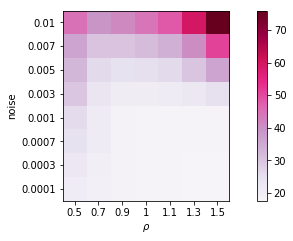

In [37]:
### your code here
plt.figure(figsize=(10,3.5))
im = plt.imshow(loss.T, vmin=abs(loss).min(), vmax=abs(loss).max(), origin='lower',cmap='PuRd')
plt.xticks(np.linspace(0,radius_set_size-1,radius_set_size), radius_set);
plt.yticks(np.linspace(0,noise_set_size-1, noise_set_size), noise_set);
plt.xlabel(r'$\rho$'); plt.ylabel('noise'); 

# im.set_interpolation('bilinear')
cb = plt.colorbar(im); 



What is the optimal set? 

In [38]:
### Your answer here
minLoss = np.min(loss)
index_min = np.where(loss == minLoss)
index_min
rho_opt = radius_set[int(index_min[0])]
noise_opt = noise_set[int(index_min[1])]
print('The optimal set is:\nspectrum radius = ',
      rho_opt,'\nnoise = ',noise_opt,'\nMSE = ',minLoss)

The optimal set is:
spectrum radius =  1.5 
noise =  0.0001 
MSE =  17.627409489705446


<div class='exercise'><b> Question 3: Explore the RC ability in long predictions [3 pts] </b></div>
In the previous question you make predictions for two time points ahead by using the previous 1500 points and for 100 future points in total. In this question we are asking to explore if the prediction window (we used 2 in Question 1 and Question 2) affects the predictability. Using the optimal hyper parameters you found in Question 2, perform the analysis for windows: 1, 2, 5, and 10. Does the MSE in the validation set depends on this window? 
<br>
<br>
**Hints:**
- Use the optimal set of hyper parameters that you found on Q2
- For this set repeat the calculation of the Q1 for different prediction windows and for the optimal window. In particular, instead of predicting two time points ahead you have to predict for 1, 2, 5, 10.
- For each prediction calculate the MSE in the validation set
- Plot the MSE as a function of the prediction window
- Comment  on your results (always!) 

In [34]:
### your code here
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.1
noise = .0001

# let k_set be an array with the prediction-window values
k_set = [1,2,5,10]

k_size = len(k_set)
loss_k = np.zeros(k_size)

for l in range(k_size):
    future = k_set[l]

    trainlen = 1500    
    futureTotal=100
    
    pred_tot=np.zeros(futureTotal)

    esn = ESN(n_inputs = 1,
          n_outputs = 1, 
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = spectral_radius,
          noise=noise)


    for i in range(0,futureTotal,future):
        pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
        prediction = esn.predict(np.ones(future))
        pred_tot[i:i+future] = prediction[:,0]
        
    loss_k[l] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])        
    

Plot the MSE as a function of the prediction window

Text(0,0.5,'MSE')

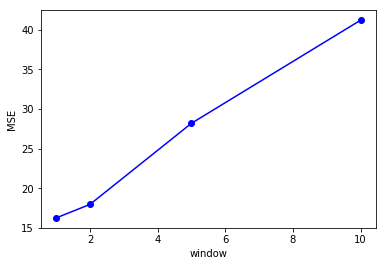

In [35]:
### your code here
plt.plot(k_set, loss_k,'-ob')
plt.xlabel('window')
plt.ylabel('MSE')

How does the predictability depend on the length of the prediction? 

In [131]:
### your comments here


In the future predictions the error propagates in time and thus it increases in time. This is the reason that as longer is a prediction as more difficult to make it. We can see this behavior in the plot above, where the MSE is an increasing monotonically function of the prediction-window, hence longer predictions mean larger MSE.